In [31]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [32]:
model = torchvision.models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\cathx/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [34]:
# model.eval

In [8]:
# extract model weights:
model_weights = []
conv_layers = []


In [10]:
model_children = list(model.children())
# model_children

In [18]:
# for i in range(6):
#     print(model_children[i])

In [24]:
# keep trach of conv layers:
counter = 0

for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
        
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter +=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
                    
print(f"total conv layers in resnet50: {counter}")

total conv layers in resnet50: 49


In [26]:
# for weight,conv in zip(model_weights, conv_layers):
#     print(f'conv: {conv} -> shape: {weight.shape}')

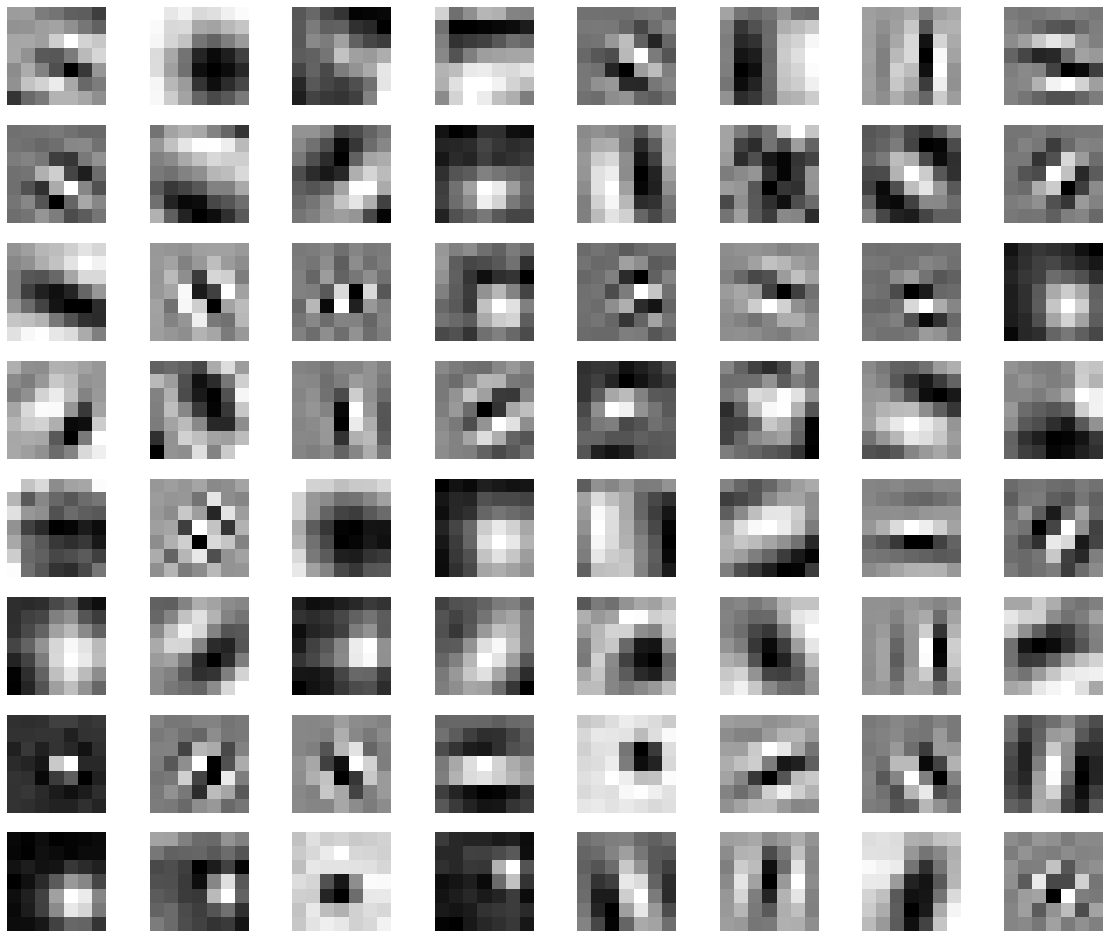

In [43]:
## Visualizing all these filterz:
plt.figure(figsize=(20,17))
for i, filter in enumerate(model_weights[1]):
    plt.subplot(8,8,i+1) 
    plt.imshow(filter[0,:,:].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('filter.png')
    
plt.show()

[('1', 'tes'), ('4', 'amina'), ('5', 'goma'), ('23', 'majj'), ('42', 'musk')]


# RegNet Model

In [105]:
!pip install tabulate


In [96]:
import torchvision.models as models
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

In [97]:
regnet= models.regnet_y_800mf(pretrained=True)

In [102]:
trace = torch.fx.symbolic_trace(regnet)

In [106]:
trace.graph.print_tabular()

opcode         name                                                target                                              args                                                                                      kwargs
-------------  --------------------------------------------------  --------------------------------------------------  ----------------------------------------------------------------------------------------  ----------------
placeholder    x                                                   x                                                   ()                                                                                        {}
call_module    stem_0                                              stem.0                                              (x,)                                                                                      {}
call_module    stem_1                                              stem.1                                              (stem_0,)      

In [99]:
features= create_feature_extractor(regnet, return_nodes=['conv1'])

ValueError: node: 'conv1' is not present in model. Hint: use `get_graph_node_names` to make sure the `return_nodes` you specified are present. It may even be that you need to specify `train_return_nodes` and `eval_return_nodes` separately.

In [101]:
nodes, _ = get_graph_node_names(regnet)#tracer_kwargs = {'leaf_modules': [conv]})
print(nodes)

['x', 'stem.0', 'stem.1', 'stem.2', 'trunk_output.block1.block1-0.proj.0', 'trunk_output.block1.block1-0.proj.1', 'trunk_output.block1.block1-0.f.a.0', 'trunk_output.block1.block1-0.f.a.1', 'trunk_output.block1.block1-0.f.a.2', 'trunk_output.block1.block1-0.f.b.0', 'trunk_output.block1.block1-0.f.b.1', 'trunk_output.block1.block1-0.f.b.2', 'trunk_output.block1.block1-0.f.se.avgpool', 'trunk_output.block1.block1-0.f.se.fc1', 'trunk_output.block1.block1-0.f.se.activation', 'trunk_output.block1.block1-0.f.se.fc2', 'trunk_output.block1.block1-0.f.se.scale_activation', 'trunk_output.block1.block1-0.f.se.mul', 'trunk_output.block1.block1-0.f.c.0', 'trunk_output.block1.block1-0.f.c.1', 'trunk_output.block1.block1-0.add', 'trunk_output.block1.block1-0.activation', 'trunk_output.block2.block2-0.proj.0', 'trunk_output.block2.block2-0.proj.1', 'trunk_output.block2.block2-0.f.a.0', 'trunk_output.block2.block2-0.f.a.1', 'trunk_output.block2.block2-0.f.a.2', 'trunk_output.block2.block2-0.f.b.0', 'tr

In [49]:
regnet_weights = []
regnet_layers = []

In [50]:
model_children = list(regnet.children())


In [67]:
stage_child = list(model_children[1].children())


In [68]:
len(stage_child)

4

In [88]:
for k in range(len(stage_child)):
#     print(stage_child[k])
    for i in range(len(stage_child[k])):
#         print(stage_child[k][i])
#         print(type(stage_child[k][i]))
#         for x in range(len(stage_child[k][i])):
        if type(stage_child[k][i]) == torchvision.models.regnet.ResBottleneckBlock:
        
            print(stage_child[k][i])
#             if type(stage_child[k][i]) == nn.Conv2d:
#                 print(stage_child[k][i])

ResBottleneckBlock(
  (proj): ConvNormActivation(
    (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (f): BottleneckTransform(
    (a): ConvNormActivation(
      (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (b): ConvNormActivation(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=4, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (se): SqueezeExcitation(
      (avgpool): AdaptiveAvgPool2d(output_size=1)
      (fc1): Conv2d(64, 8, kernel_size=(1, 1), stride=(1, 1))
      (fc2): Conv2d(8, 64, kernel_size=(1, 1), stride=(1, 1))
      (activation): ReLU()
      (scale_activation): Sigmoid()
    )
  

In [65]:
for i in range(len(list(model_children[1]))-1):
    print(model_children[0][i])

Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)


In [58]:
for i in range(0, len(model_children)-1):
#     print(model_children[i])
    if type(model_children[i]) == nn.Sequential:
        for k in model_children[i]:
            for x in model_children[i][k]:
                if type(model_children[i][k][x]) == nn.Conv2d:
                    print(model_children[i][k][x])

TypeError: 'AnyStage' object cannot be interpreted as an integer

In [26]:
counter = 0
for i in range(len(model_children)):
#     for k in model_children[i]:
#         print(type(k))
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter +=1
#                     regnet_weights.append(child.weight)
#                     regnet_layers.append(child)


In [38]:
for i in range(len(model_children)):
#     print(model_children[i])
    if type(model_children[i]) == nn.Sequential:
        for k in model_children[i]:
            if type(model_children[i][k]) == nn.Conv2d:
                
                print(model_children[i][k])

TypeError: 'AnyStage' object cannot be interpreted as an integer

In [27]:
counter

0

In [46]:
model_children

[SimpleStemIN(
   (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
   (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace=True)
 ),
 Sequential(
   (block1): AnyStage(
     (block1-0): ResBottleneckBlock(
       (proj): ConvNormActivation(
         (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
         (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       )
       (f): BottleneckTransform(
         (a): ConvNormActivation(
           (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
           (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
           (2): ReLU(inplace=True)
         )
         (b): ConvNormActivation(
           (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=4, bias=False)
           (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [14]:
# regnet.eval()

In [11]:
# keep trach of conv layers:
counter = 0

for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        regnet_weights.append(model_children[i].weight)
        regnet_layers.append(model_children[i])
        
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter +=1
                    regnet_weights.append(child.weight)
                    regnet_layers.append(child)
                    
print(f"total conv layers in regnet: {counter}")

total conv layers in regnet: 0
